Note Book to detect harmful ingredients from a given list comparing to the harmful ingredient text file

In [1]:
import pandas as pd
data = pd.read_csv('data/new_product_info.csv')

In [3]:
# Load harmful ingredients from the text file
with open("data/harmful_ingredients.txt", "r") as file:
    harmful_ingredients = [line.strip() for line in file]

# Example input ingredients
input_ingredients = ["WATER/EAU, SODIUM LAURYLSULFATE, SODIUM LAURETH SULFATE, COCAMIDOPROPYL BE- TAINE, GLYCOL DISTEARATE, DIMETHICONE, SODIUM CITRATE, COCAMIDE MEA, SODIUM XYLENESULFONATE, FRAGRANCE/ PARFUM, CITRIC ACID, SODIUM BENZOATE, POLYQUATERNI- UM-76, SODIUM CHLORIDE, TETRASODIUM EDTA, PANTHE- NOL, PANTHENYL ETHYL ETHER, METHYLCHLOROISOTHIAZOLIN- ONE, METHYLISOTHIAZOLINONE"]

In [4]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Batch process harmful ingredient embeddings
batch_size = 1000  # Adjust based on your system's memory
harmful_embeddings = []
for i in range(0, len(harmful_ingredients), batch_size):
    batch = harmful_ingredients[i:i + batch_size]
    embeddings = model.encode(batch, convert_to_tensor=True)
    harmful_embeddings.append(embeddings)
harmful_embeddings = np.vstack(harmful_embeddings)  # Combine all batches


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
import faiss

# Create a FAISS index
embedding_dim = harmful_embeddings.shape[1]
index = faiss.IndexFlatL2(embedding_dim)  # L2 (Euclidean) distance
index.add(harmful_embeddings)  # Add harmful ingredient embeddings to the index

# Encode input ingredients
input_embeddings = model.encode(input_ingredients)

# Search for the nearest neighbors
distances, indices = index.search(input_embeddings, k=5)  # Top 5 similar ingredients

# Map results back to harmful ingredients
for i, ingredient in enumerate(input_ingredients):
    print(f"Input Ingredient: {ingredient}")
    print("Potentially Harmful Matches:")
    for idx in indices[i]:
        print(f"- {harmful_ingredients[idx]} (Distance: {distances[i][idx]:.4f})")


Input Ingredient: WATER/EAU, SODIUM LAURYLSULFATE, SODIUM LAURETH SULFATE, COCAMIDOPROPYL BE- TAINE, GLYCOL DISTEARATE, DIMETHICONE, SODIUM CITRATE, COCAMIDE MEA, SODIUM XYLENESULFONATE, FRAGRANCE/ PARFUM, CITRIC ACID, SODIUM BENZOATE, POLYQUATERNI- UM-76, SODIUM CHLORIDE, TETRASODIUM EDTA, PANTHE- NOL, PANTHENYL ETHYL ETHER, METHYLCHLOROISOTHIAZOLIN- ONE, METHYLISOTHIAZOLINONE
Potentially Harmful Matches:
- Diazolidinyl urea,DMDM hydantoin,3-dimethylol-5,5-dimethylhydantoin,Imidazolidinyl urea,Sodium hydroxymethylglycinate,Quaternium-15,Dowicil 200,N-(3-chloroallyl) hexaminium chloride,p-phenylenediamine,PPD,Coal-tar,Nickel,Gold (Distance: 14.7428)
- Latex,Amyl cinnamal,Amylcinnamyl alcohol,Anisyl alcohol,Benzyl alcohol,Benzyl benzoate,Benzyl cinnamate,Benzyl salicylate,Cinnamyl alcohol,Cinnamaldehyde,Citral,Citronellol,Coumarin,Eugenol,Farnesol,Geraniol,Hexyl,cinnamaladehyde,Hydroxycitronellal,Hydroxyisohexyl 3-cyclohexene carboxaldehyde,HICC,Lyral,Isoeugenol,Lilial,d-Limonene,Linalo

In [6]:
import re

#Open the file and read its content
with open("data/red_list.txt", "r" , encoding="utf-8") as ingredient_list:
    file_content = ingredient_list.read()


# Regex to split by commas that are not part of numbers/hyphenated names
ingredients = re.split(
    r',\s*(?![^()]*\))(?!(?<=\d)-\d)(?!(?<=\d)\s*\d)',
    file_content
)

# To remove the None values
ingredients = [ i for i in ingredients if i is not None]

print(ingredients)

['1-(5,6,7,8-Tetrahydro3,5,5,6,8,8-hexamethyl2-naphthyl)ethan-1-one(Fixolid)', 'Trichloroethane', '1', '2-Ethanediol; Ethylene glycol; PEG-23M', '1', '4', '5', '8-tetraaminoanthraquinone', '1-Butanol', '1-Hexanol', '2-ethyl-', '1-tert-Butoxypropan-2-ol', '1-vinylimidazole', '1', '4-Dioxane', 'Benzophenone-1;2', '4-Dihydroxybenzophenon;Resbenzophenone', '2', '4-Hexadienal (89% trans,trans isomer; 11% cis, transisomer) ', 'Sorbaldehyde', '2-benzyl-2-dimethylamino-4’-morpholinobutyrophenone', '2-Amino-4-chlorophenol', '2-ethoxyethyl acetate', '2-ethylhexyl acrylate', 'Octinoxate (2-Ethylhexylp-methoxycinnamate;2-Propenoic acid', '3-(4-methoxyphenyl)-,2-ethylhexyl ester)', '2-Methylphenol', 'o-Cresol', '2-Methylpropanol', '3-Benzylidene camphor(3-BC); 1', '7', '7-trimethyl3-(phenylmethylene)bicyclo[2.2.1]heptan-2-one', '4-(1,1,3,3-tetramethylbutyl)phenol', 'ethoxylated ', '4-methylbenzylidene camphor', '4-MBC', 'Acetaldehyde', 'Acetone', 'Arsenic', 'Benzaldehyde', 'Benzene', 'Benzofuran', 

In [4]:
import re

# Read the file content
with open("data/red_list.txt", "r", encoding="utf-8") as f:
    content = f.read()

# Step 1: Protect comma-separated numbers before hyphenated words
def protect_numeric_sequences(text):
    # Protect sequences like "1,4,5,8-tetraaminoanthraquinone"
    text = re.sub(r'(\d+(?:,\d+)+)-([a-zA-Z])', r'\1NUM_- \2', text)

    # Protect commas inside parentheses (e.g., "(3-BC)")
    text = re.sub(r'\(([^)]*)\)', lambda m: m.group().replace(',', 'COMMA_PROTECTED'), text)

    return text

content = protect_numeric_sequences(content)

# Step 2: Split ONLY on unprotected commas
ingredients = [i.strip() for i in content.split(',') if i.strip()]

# Step 3: Restore protected commas and fix hyphenated sequences
ingredients = [
    i.replace('COMMA_PROTECTED', ',')
     .replace('NUM_- ', '-')  # Restore the proper hyphen
    for i in ingredients
]

print(ingredients)

['1-(5,6,7,8-Tetrahydro3,5,5,6,8,8-hexamethyl2-naphthyl)ethan-1-one(Fixolid)', 'Trichloroethane', '1', '2-Ethanediol; Ethylene glycol; PEG-23M', '1', '4', '5', '8-tetraaminoanthraquinone', '1-Butanol', '1-Hexanol', '2-ethyl-', '1-tert-Butoxypropan-2-ol', '1-vinylimidazole', '1', '4-Dioxane', 'Benzophenone-1;2', '4-Dihydroxybenzophenon;Resbenzophenone', '2', '4-Hexadienal (89% trans,trans isomer; 11% cis, transisomer)', 'Sorbaldehyde', '2-benzyl-2-dimethylamino-4’-morpholinobutyrophenone', '2-Amino-4-chlorophenol', '2-ethoxyethyl acetate', '2-ethylhexyl acrylate', 'Octinoxate (2-Ethylhexylp-methoxycinnamate;2-Propenoic acid,3-(4-methoxyphenyl)-', '2-ethylhexyl ester)', '2-Methylphenol', 'o-Cresol', '2-Methylpropanol', '3-Benzylidene camphor(3-BC); 1', '7', '7-trimethyl3-(phenylmethylene)bicyclo[2.2.1]heptan-2-one', '4-(1,1,3,3-tetramethylbutyl)phenol', 'ethoxylated', '4-methylbenzylidene camphor', '4-MBC', 'Acetaldehyde', 'Acetone', 'Arsenic', 'Benzaldehyde', 'Benzene', 'Benzofuran', 'B

In [10]:
import re

concern_chems = []
red_list = []
the_gens = []

# Function to normalize ingredient names
def normalize_ingredient(ingredient):
    ingredient = ingredient.lower()  # Convert to lowercase
    ingredient = re.sub(r'[-.,/]+', ' ', ingredient)  # Replace separators with space
    ingredient = re.sub(r'\s+', ' ', ingredient).strip()  # Remove extra spaces
    return ingredient


# Input ingredients (list of ingredients to check)
input_ingredients = [
    "AQUA/WATER/EAU", "SODIUM LAURETH SULFATE", "DIMETHICONE", "LAURYL GLUCOSIDE",
    "COCAMIDOPROPYL BETAINE", "ACRYLATES COPOLYMER", "SODIUM CHLORIDE", "LAURETH-4",
    "CAPRYLYL GLYCOL", "GLYCOL DISTEARATE", "GLYCERYL OLEATE", "COCO-GLUCOSIDE",
    "HYDROXYPROPYL GUAR HYDROXYPROPYLTRIMONIUM CHLORIDE", "LAURETH-23", "SODIUM HYDROXIDE",
    "CITRIC ACID", "DISODIUM EDTA", "MELALEUCA ALTERNIFOLIA LEAF (TEA TREE)",
    "PROPYLENE GLYCOL", "HUMULUS LUPULUS FLOWER EXTRACT (HOPS)",
    "SALVIA OFFICINALIS LEAF EXTRACT (SAGE)", "PARFUM/FRAGRANCE", "PHENOXYETHANOL",
    "BENZYL ALCOHOL"
]

with open("data/concern_chems.txt") as f:
    concern_chems = [line.strip() for line in f]

with open("data/red_list.txt") as f:
    red_list = [line.strip() for line in f]

with open("data/the_gens.txt") as f:
    the_gens = [line.strip() for line in f]


# Converting all lists into lower case
concern_chems1 = [normalize_ingredient(i) for i in concern_chems]
red_list1 = [normalize_ingredient(i) for i in red_list]
the_gens1 = [normalize_ingredient(i) for i in the_gens]
input_ingredients1 = [normalize_ingredient(ing) for ing in input_ingredients]


red_list_include = []
for i in input_ingredients1:
    for j in red_list1:
        if i in j:
            red_list_include.append(j)

the_gens_include = []
for i in input_ingredients1:
    for j in the_gens1:
        if i in j:
            if i not in red_list_include:
                the_gens_include.append(j)

concern_chems_include = []
for i in input_ingredients1:
    for j in concern_chems1:
        if i in j:
            if i not in red_list_include:
                if i not in the_gens_include:
                    concern_chems_include.append(j)

print(red_list_include)
print(the_gens_include)
print(concern_chems_include)

[]
['bis aminopropyl dimethicone', 'sodium hydroxide', 'phenoxyethanol', 'benzyl alcohol']
[]


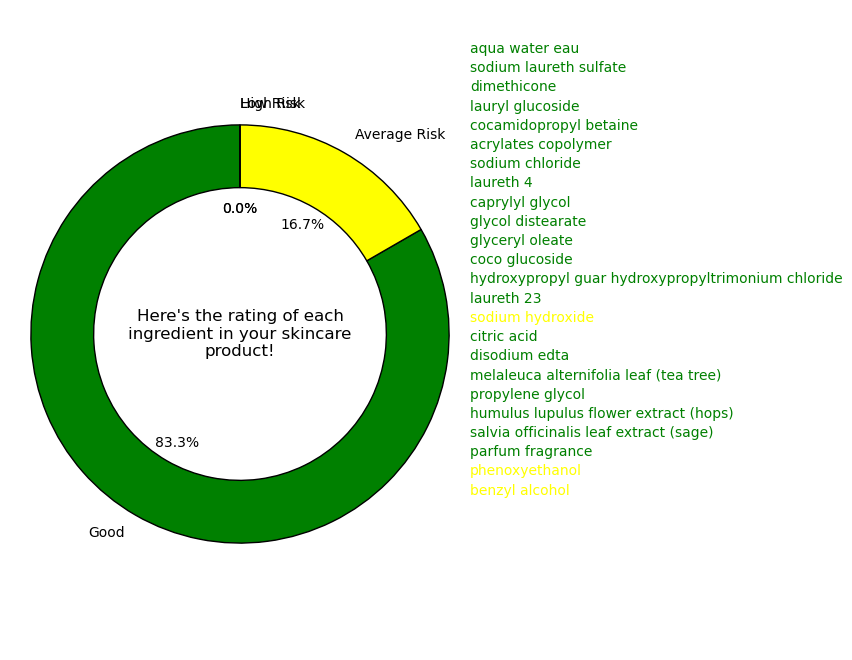

In [18]:
import re
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon

# ... (your existing code for loading and processing ingredients) ...

# Calculate counts for visualization
high_risk_count = len(red_list_include)
average_risk_count = len(the_gens_include)
low_risk_count = len(concern_chems_include)
good_count = len(input_ingredients1) - high_risk_count - average_risk_count - low_risk_count

# Visualization using Matplotlib

# Pie Chart with Donut Hole
fig, ax = plt.subplots(figsize=(8, 8))

# Data and labels
data = [good_count, average_risk_count, high_risk_count, low_risk_count]  # Include all categories
labels = ['Good', 'Average Risk', 'High Risk', 'Low Risk']  # Updated labels
colors = ['green', 'yellow', 'red', 'orange']  # Updated colors

# Donut chart parameters
wedgeprops = {'width': 0.3, 'edgecolor': 'black'}  # Adjust width for hole size
center_circle = Circle((0, 0), 0.4, color='white')  # Circle in the center
ax.add_artist(center_circle)

# Create the pie chart (with the "donut" hole)
wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', startangle=90,
                                  colors=colors, labels=labels, wedgeprops=wedgeprops,
                                  textprops={'color': 'black'})


# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add title inside the donut hole
ax.text(0, 0, "Here's the rating of each\ningredient in your skincare\nproduct!", ha='center', va='center', fontsize=12, color='black')

# Add ingredient list (right side)
fig.subplots_adjust(right=0.7)  # Adjust right margin for ingredient list
ax2 = fig.add_axes([0.7, 0.1, 0.25, 0.8])  # left, bottom, width, height
ax2.axis('off')  # hide axis

# Combine ingredients for display with correct colors
ingredients_to_display = []
for ing in input_ingredients1:
    if ing in red_list_include:
        ingredients_to_display.append((ing, 'red'))
    elif ing in the_gens_include:
        ingredients_to_display.append((ing, 'yellow'))
    elif ing in concern_chems_include:
        ingredients_to_display.append((ing, 'orange'))
    else:
        ingredients_to_display.append((ing, 'green'))

# Display ingredients with color coding
y_pos = 0.95
for ing, color in ingredients_to_display:
    ax2.text(0, y_pos, ing, color=color, fontsize=10, va='top')
    y_pos -= 0.03  # Adjust spacing as needed

# Add "NEW ANALYSIS" button (just a visual representation, no functionality)
# You would need a GUI framework for actual button functionality
rect = plt.Rectangle((0.05, 0.02), 0.2, 0.05, linewidth=1, edgecolor='black', facecolor='lightgray')

plt.show()